In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [42]:
df = pd.read_csv("/content/Taxi_Trips_-_2024_20240408.csv")

df.head()


,Trip ID,Taxi ID,Trip Start Timestamp,Trip End Timestamp,Trip Seconds,Trip Miles,Pickup Census Tract,Dropoff Census Tract,Pickup Community Area,Dropoff Community Area,...,Extras,Trip Total,Payment Type,Company,Pickup Centroid Latitude,Pickup Centroid Longitude,Pickup Centroid Location,Dropoff Centroid Latitude,Dropoff Centroid Longitude,Dropoff Centroid Location
0,0287f53fedcde6b0af9aab9e32cbd2cadb337eaa,e54db25f18193a08f1f5754515e8c338480e04fb938ed3...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,15.0,0.09,NaN,NaN,8.0,8.0,...,35.0,38.75,Credit Card,City Service,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
1,1f0034299b914fd7b45002568576a353c83acb2f,4a263f78f56815be4acd38658af8fc1824ce4e15f7ec81...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,900.0,3.00,NaN,NaN,24.0,8.0,...,0.0,12.00,Cash,Taxi Affiliation Services,41.901207,-87.676356,POINT (-87.6763559892 41.9012069941),41.899602,-87.633308,POINT (-87.6333080367 41.899602111)
2,01a0b77b722a0b91f45cb4fc90b3e64f76fd0681,4f1e94982e6851725add382f7981d64006ae7c38f3664f...,03/01/2024 12:00:00 AM,03/01/2024 12:00:00 AM,711.0,5.84,NaN,NaN,56.0,NaN,...,5.0,26.70,Credit Card,City Service,41.792592,-87.769615,POINT (-87.7696154528 41.7925923603),NaN,NaN,NaN
3,14aff2071ac81c6450a8f8b0e1534497da900197,de8e8659ceb9eb0da842a46b60c0a5207098ac69fc23ab...,03/01/2024 12:00:00 AM,03/01/2024 12:30:00 AM,1770.0,13.36,NaN,NaN,76.0,3.0,...,4.0,47.10,Credit Card,Sun Taxi,41.980264,-87.913625,POINT (-87.913624596 41.9802643146),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)
4,16d3a633e2f380cee4a7fa4677db163b6e91255d,d79d3e19a1d5f6cb0cd4449d5579412262a2f1b182799d...,03/01/2024 12:00:00 AM,03/01/2024 12:15:00 AM,849.0,6.13,NaN,NaN,8.0,3.0,...,0.0,22.82,Mobile,5 Star Taxi,41.899602,-87.633308,POINT (-87.6333080367 41.899602111),41.965812,-87.655879,POINT (-87.6558787862 41.96581197)


In [43]:
drop_cols = [
    "Trip ID",
    "Taxi ID",
    "Trip Start Timestamp",
    "Trip End Timestamp",
    "Payment Type",
    "Company",
    "Pickup Centroid Location",
    "Dropoff Centroid  Location",
    "Trip Total"
]

df = df.drop(columns=drop_cols, errors="ignore")

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 865247 entries, 0 to 865246
Data columns (total 14 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Trip Seconds                865078 non-null  float64
 1   Trip Miles                  865241 non-null  float64
 2   Pickup Census Tract         327251 non-null  float64
 3   Dropoff Census Tract        313854 non-null  float64
 4   Pickup Community Area       842052 non-null  float64
 5   Dropoff Community Area      781394 non-null  float64
 6   Fare                        863202 non-null  float64
 7   Tips                        863202 non-null  float64
 8   Tolls                       863202 non-null  float64
 9   Extras                      863202 non-null  float64
 10  Pickup Centroid Latitude    842281 non-null  float64
 11  Pickup Centroid Longitude   842281 non-null  float64
 12  Dropoff Centroid Latitude   785572 non-null  float64
 13  Dropoff Centro

In [44]:
df = df.fillna(df.mean(numeric_only=True))

print("Missing values after filling:\n", df.isna().sum())


Missing values after filling:
 Trip Seconds                  0
Trip Miles                    0
Pickup Census Tract           0
Dropoff Census Tract          0
Pickup Community Area         0
Dropoff Community Area        0
Fare                          0
Tips                          0
Tolls                         0
Extras                        0
Pickup Centroid Latitude      0
Pickup Centroid Longitude     0
Dropoff Centroid Latitude     0
Dropoff Centroid Longitude    0
dtype: int64


In [45]:
target = "Fare"
X = df.drop(columns=[target])
y = df[target]

print("Features used for training:\n", X.columns.tolist())


Features used for training:
 ['Trip Seconds', 'Trip Miles', 'Pickup Census Tract', 'Dropoff Census Tract', 'Pickup Community Area', 'Dropoff Community Area', 'Tips', 'Tolls', 'Extras', 'Pickup Centroid Latitude', 'Pickup Centroid Longitude', 'Dropoff Centroid Latitude', 'Dropoff Centroid Longitude']


In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predictions for train & test
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


In [49]:
# Train performance
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Test performance
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("TRAIN RMSE:", round(train_rmse, 2), "| R²:", round(train_r2, 4))
print("TEST  RMSE:", round(test_rmse, 2), "| R²:", round(test_r2, 4))


TRAIN RMSE: 18.2 | R²: 0.5236
TEST  RMSE: 11.94 | R²: 0.6159


TEST RMSE: 11.94 | R²: 0.6159


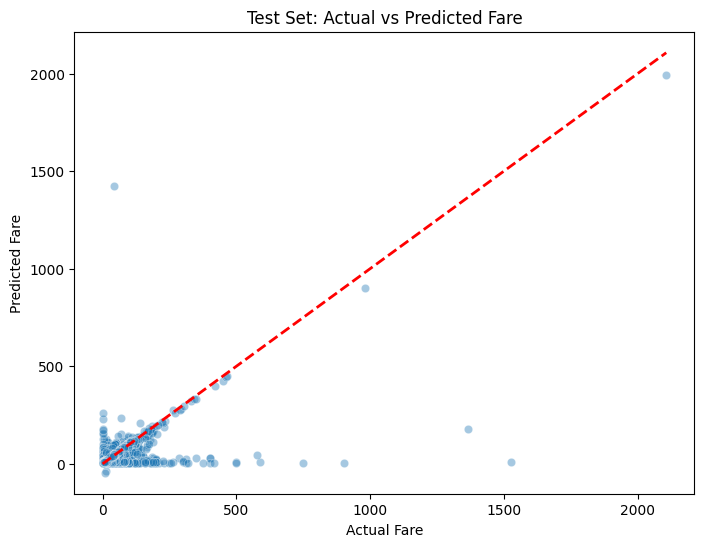

In [50]:
# Test performance
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print(f"TEST RMSE: {test_rmse:.2f} | R²: {test_r2:.4f}")

# Plot Actual vs Predicted for Test set
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_test_pred, alpha=0.4)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Test Set: Actual vs Predicted Fare")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.show()
